In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)
train_images: (60000, 28, 28)
test_images: (10000, 28, 28)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


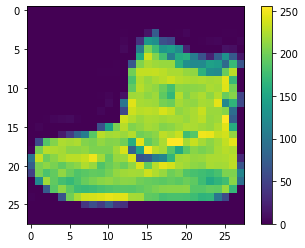

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_3.fit(train_images, train_labels, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5185 - accuracy: 0.8174 - val_loss: 0.4219 - val_accuracy: 0.8501
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3841 - accuracy: 0.8617 - val_loss: 0.3959 - val_accuracy: 0.8543
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3420 - accuracy: 0.8769 - val_loss: 0.3585 - val_accuracy: 0.8695
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.8826 - val_loss: 0.3462 - val_accuracy: 0.8766
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2990 - accuracy: 0.8904 - val_loss: 0.3250 - val_accuracy: 0.8811


In [12]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3540 - accuracy: 0.8750


In [13]:
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5220 - accuracy: 0.8095 - val_loss: 0.4032 - val_accuracy: 0.8537
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3793 - accuracy: 0.8588 - val_loss: 0.3926 - val_accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3476 - accuracy: 0.8711 - val_loss: 0.3595 - val_accuracy: 0.8640
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3205 - accuracy: 0.8798 - val_loss: 0.3446 - val_accuracy: 0.8738
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8706
Model - 6 layers - test loss: 35.697534680366516
Model - 6 layers - test accuracy: 87.05999851226807


In [18]:
predictions = model_3.predict(test_images)
predictions.shape
predictions[0]

array([2.86626891e-06, 1.16762713e-07, 1.07297853e-06, 1.16954176e-07,
       3.77301603e-07, 9.50944202e-04, 4.41301972e-06, 9.64578707e-03,
       2.22994163e-06, 9.89392042e-01], dtype=float32)

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

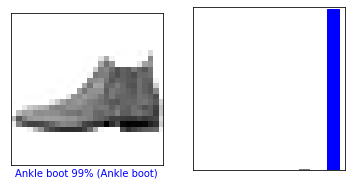

In [21]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)